In [7]:
import numpy as np
import pandas as pd
from datetime import datetime, date, time, timedelta
import matplotlib.pyplot as plt
from scipy import stats,optimize
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import r2_score,mean_squared_error


import import_ipynb
import BeginningAnalysis
import requests
import json


importing Jupyter notebook from BeginningAnalysis.ipynb


<Figure size 800x800 with 1 Axes>

Coefficient: 
 156.8
R-squared: 0.84


<Figure size 800x800 with 1 Axes>

Coefficient: 
 0.68
R-squared: 0.00


<Figure size 800x800 with 1 Axes>

Coefficient: 
 -2.46
R-squared: 0.01


<Figure size 800x800 with 1 Axes>

Coefficient: 
 11.44
R-squared: 0.09


<Figure size 800x800 with 1 Axes>

Results of Dickey-Fuller Test:
Test Statistic                 -5.008690
p-value                         0.000021
#Lags Used                      0.000000
Number of Observations Used    23.000000
dtype: float64
Best ARIMA(0, 1, 0) MSE=1422.000


<Figure size 640x480 with 1 Axes>

<Figure size 800x800 with 1 Axes>

Results of Dickey-Fuller Test:
Test Statistic                 -5.556892
p-value                         0.000002
#Lags Used                      0.000000
Number of Observations Used    45.000000
dtype: float64


<Figure size 800x800 with 1 Axes>

Results of Dickey-Fuller Test:
Test Statistic                -6.564338e+00
p-value                        8.230672e-09
#Lags Used                     1.000000e+01
Number of Observations Used    2.900000e+01
dtype: float64
Best ARIMA(2, 1, 0) MSE=3698.317


/home/robin/.local/lib/python3.6/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [8]:
weather_spiro = pd.read_csv('weather_spiro.csv',parse_dates=['time'])
weather_spiro.set_index('Date',inplace=True)
weather_spiro.head()

,Hour,barometricPressure,precipitationLastHour,relativeHumidity,temperature,time,PEF(l/min),FEV1(l),unixDate,unixTime
Date,,,,,,,,,,
2020-02-23,19,102030.0,0.0,30.412102,10.6,2020-02-23 19:51:00,476,2.78,18315.0,70320.0
2020-02-23,19,102030.0,0.0,33.061975,10.6,2020-02-23 19:27:00,476,2.78,18315.0,70320.0
2020-02-24,5,101970.0,0.0,72.888442,3.3,2020-02-24 05:51:00,294,1.62,18316.0,18780.0
2020-02-24,15,101830.0,0.0,60.763303,9.4,2020-02-24 15:51:00,384,2.49,18316.0,56220.0
2020-02-25,4,101420.0,0.0,88.909044,6.7,2020-02-25 04:51:00,382,2.93,18317.0,15240.0


In [23]:
raw_spiro = pd.read_csv('raw_spiro.csv',parse_dates=['Date'])
raw_spiro.set_index(['Date'],inplace=True)
raw_spiro = raw_spiro.drop(['Time'], axis=1)
raw_spiro.head()

,PEF(l/min),FEV1(l),unixDate,unixTime,Hour
Date,,,,,
2020-02-21,219,1.72,18313.0,36720.0,10
2020-02-21,253,1.78,18313.0,42300.0,11
2020-02-22,388,2.54,18314.0,12660.0,3
2020-02-22,415,2.89,18314.0,480.0,0
2020-02-23,476,2.78,18315.0,70320.0,19


In [2]:
#https://docs.airnowapi.org/ is good but is currently down - using local data
TOKEN = %env AIR_NOW_TOKEN

UsageError: Environment does not have key: AIR_NOW_TOKEN


In [37]:
#date.strftime('%Y-%m-%d')
pollution = pd.DataFrame(index=raw_spiro.index,columns=['a','b','c'])
pollution.loc[raw_spiro.index[0]] = pd.Series([1, 5, 2])
#pollution[raw_spiro.index[2]] = 2
#df = pandas.DataFrame(columns=['a','b','c','d'], index=['x','y','z'])
#df.loc['y'] = pandas.Series({'a':1, 'b':5, 'c':2, 'd':3})




ValueError: shape mismatch: value array of shape (2,) could not be broadcast to indexing result of shape (2,3)

In [40]:
pd.DataFrame(columns=['OZONE','PM2.5','PM10'])

,OZONE,PM2.5,PM10


In [45]:
def get_daily_pollution(date,zip_code,factors,distance=5):
    r = requests.get('http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json'
                     +'&zipCode=' + str(zip_code) + '&date=' + date.strftime('%Y-%m-%d') + 'T00-0000'
                     +'&distance=' + str(distance) + '&API_KEY=' + TOKEN)
    return json.loads(r.text)



,OZONE,PM2.5,PM10


In [47]:
raw_spiro.index[:10]

DatetimeIndex(['2020-02-21', '2020-02-21', '2020-02-22', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-24', '2020-02-25',
               '2020-02-25', '2020-02-26'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [63]:
#pollution = pd.DataFrame(index=raw_spiro.index)

zip_code = 11432
distance = 5
factors = ['OZONE','PM2.5','PM10']
results = pd.DataFrame(columns=factors,index=raw_spiro.index)
for day in raw_spiro.index:
    daily_pollution = get_daily_pollution(day,zip_code,factors)
    df = pd.DataFrame(columns=factors)
    for item in daily_pollution:
        
        for factor in factors:
            if item['ParameterName'] == factor:
                results[factor][day] = item['AQI']
        #df['Date'] = pd.to_datetime(item['DateObserved'])
    #print(df.head())
    #results = results.append(df, ignore_index=True)

results.head()

,OZONE,PM2.5,PM10
Date,,,
2020-02-21,38,26,11
2020-02-21,38,26,11
2020-02-22,39,39,18
2020-02-22,39,39,18
2020-02-23,43,49,21


In [61]:
df = pd.DataFrame(columns=factors,index=raw_spiro.index)
df['OZONE'][raw_spiro.index[0]]=10

#df['OZONE'] = 35
df

,OZONE,PM2.5,PM10
Date,,,
2020-02-21,10,NaN,NaN
2020-02-21,10,NaN,NaN
2020-02-22,NaN,NaN,NaN
2020-02-22,NaN,NaN,NaN
2020-02-23,NaN,NaN,NaN
2020-02-24,NaN,NaN,NaN
2020-02-24,NaN,NaN,NaN
2020-02-25,NaN,NaN,NaN
2020-02-25,NaN,NaN,NaN


In [9]:
pollution = pd.read_csv('pollution.csv',parse_dates=['date'])
pollution = pollution.rename(columns={"date": "Date"})
pollution.set_index('Date',inplace=True)
pollution = pollution.replace(' ','0')
pollution = pollution.astype('int64')

In [10]:
spiro_pollution = pollution.join(raw_spiro,how='inner')
spiro_pollution.head()

,pm25,o3,no2,co,PEF(l/min),FEV1(l),unixDate,unixTime,Hour
Date,,,,,,,,,
2020-02-21,15,27,12,2,219,1.72,18313.0,36720.0,10
2020-02-21,15,27,12,2,253,1.78,18313.0,42300.0,11
2020-02-22,16,26,22,3,388,2.54,18314.0,12660.0,3
2020-02-22,16,26,22,3,415,2.89,18314.0,480.0,0
2020-02-23,36,29,0,0,476,2.78,18315.0,70320.0,19


In [11]:
Y = spiro_pollution['PEF(l/min)']
X = spiro_pollution[[' pm25',' o3',' no2',' co']]
X = sm.add_constant(X)

mod = sm.OLS(Y,X)
fit = mod.fit()
summary = fit.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PEF(l/min)   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     2.862
Date:                Wed, 08 Apr 2020   Prob (F-statistic):             0.0242
Time:                        05:31:08   Log-Likelihood:                -1378.6
No. Observations:                 235   AIC:                             2767.
Df Residuals:                     230   BIC:                             2785.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        418.8710     69.636      6.015      0.000     281.665     556.077
 pm25          0.0642      0.542      0.118      0.906      -1.004       1.132
 o3            0.5872      2.017      0.291      0.771      -3.388       4.562
 no2           4.4702      2.094      2.135      0.034       0.345       8.595
 co          -51.1645     17.442     -2.933      0.004     -85.532     -16.797
==============================================================================
Omnibus:                        3.018   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.221   Jarque-Bera (JB):                2.307
Skew:                           0.091   Prob(JB):                        0.316
Kurtosis:                       2.550   Cond. No.                         473.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

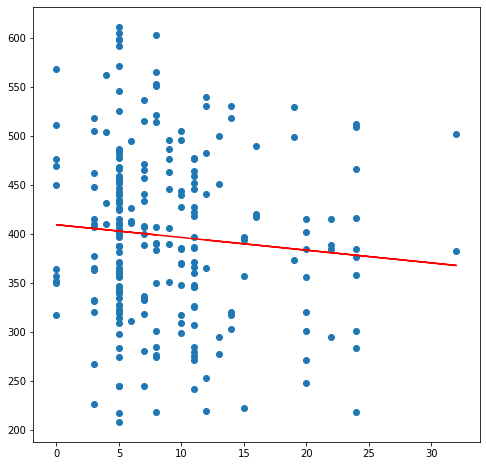

Coefficient: 
 -1.3
R-squared: 0.01


In [77]:
lin_reg_plot(spiro_pollution[' no2'],spiro_pollution['PEF(l/min)'])